# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Mục lục
- [I. Thông tin nhóm](#i)
- [II. Thu thập dữ liệu](#ii)
    - [1. Chủ đề](#ii1)
    - [2. Nguồn dữ liệu](#ii2)
    - [3. Cách thu thập](#ii3)
- [III. Khám phá dữ liệu](#iii)
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
        - [a. Tiền xử lý](#iva)
        - [b. Trực quan hóa](#ivb)
        - [c. Nhận xét và kết luận (trả lời câu hỏi)](#ivc)
    - [2. Câu hỏi 2](#iv2)
        - [a. Tiền xử lý](#iv2a)
        - [b. Trực quan hóa](#iv2b)
        - [c. Nhận xét và kết luận (trả lời câu hỏi)](#iv2c)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
- [V. Nhận xét quá trình làm đồ án](#v)
    - [1. Thành viên 1](#v1)
    - [2. Thành viên 2](#v2)
    - [3. Thành viên 3](#v3)
    - [4. Ý kiến nhóm](#v4)
- [Tài liệu tham khảo](#tltk)


## I. Thông tin nhóm <a id="i"></a>

| Họ tên                | MSSV              | Công việc | Hoàn thành(%)|
|-----------------------|-------------------|-----------|--------------|
|Nguyễn Tiến Quốc      |   22120300        |           | 100%         |
|Nguyễn Trung Quôc      |   22120301        |           | 100%         |
|Võ Thành Tâm      |   22120324        |           | 100%         |

## II. Thu thập dữ liệu <a id="ii"></a>

### 1. Chủ đề <a id="ii1"></a>

### 2. Nguồn dữ liệu <a id="ii2"></a>

### 3. Cách thu thập <a id="ii3"></a>

## III. Khám phá dữ liệu  <a id="iii"></a>

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

Những đặc trưng nào ảnh hưởng tới giá cả của laptop? Các thương hiệu nào cung cấp cấu hình cao với giá cả hợp lý nhất?

#### a. Tiền xử lý <a id="iva"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('./Dataset/laptop_prices.csv', encoding='Latin-1')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
# df = pd.read_csv('./Dataset/laptop_price.csv', encoding='Latin-1')
# df.head()

In [4]:
# In ra các loại GPU có trong dữ liệu
df['GPU_model'] = df['GPU_model'].str.lower()
gpu = df['GPU_model'].unique()
gpu

array(['iris plus graphics 640', 'hd graphics 6000', 'hd graphics 620',
       'radeon pro 455', 'iris plus graphics 650', 'radeon r5',
       'iris pro graphics', 'geforce mx150', 'uhd graphics 620',
       'hd graphics 520', 'radeon pro 555', 'radeon r5 m430',
       'hd graphics 615', 'radeon pro 560', 'geforce 940mx',
       'hd graphics 400', 'geforce gtx 1050', 'radeon r2', 'radeon 530',
       'geforce 930mx', 'hd graphics', 'hd graphics 500',
       'geforce 930mx ', 'geforce gtx 1060', 'geforce 150mx',
       'iris graphics 540', 'radeon rx 580', 'geforce 920mx',
       'radeon r4 graphics', 'radeon 520', 'geforce gtx 1070',
       'geforce gtx 1050 ti', 'geforce mx130', 'r4 graphics',
       'geforce gtx 940mx', 'radeon rx 560', 'geforce 920m',
       'radeon r7 m445', 'radeon rx 550', 'geforce gtx 1050m',
       'hd graphics 515', 'radeon r5 m420', 'hd graphics 505',
       'gtx 980 sli', 'r17m-m1-70', 'geforce gtx 1080', 'quadro m1200',
       'geforce 920mx ', 'geforce gtx

In [5]:
# In ra các hãng GPU có trong dữ liệu
df['GPU_company'] = df['GPU_company'].str.lower()
gpu = df['GPU_company'].unique()
gpu

array(['intel', 'amd', 'nvidia', 'arm'], dtype=object)

Các Nhóm Phân Loại GPU:

- Intel Graphics: Bao gồm các GPU như iris plus graphics 640, hd graphics 6000, hd graphics 620, iris plus graphics 650, iris pro graphics, uhd graphics 620, hd graphics 520, hd graphics 615, hd graphics 400, hd graphics, hd graphics 500, iris graphics 540, hd graphics 515, hd graphics 505, iris graphics 550, hd graphics 630, hd graphics 510, hd graphics 405, hd graphics 530, graphics 620, hd graphics 540, hd graphics 5300, hd graphics 620.

- Nvidia GeForce High-End: Bao gồm các GPU dòng GeForce cao cấp như geforce gtx 1050, geforce gtx 1060, geforce gtx 1070, geforce gtx 1050 ti, gtx 980 sli, geforce gtx 1080, geforce gtx 980m, geforce gtx 965m, geforce gtx1080, geforce gtx1050 ti, geforce gtx 970m, geforce gtx 1070m, geforce gtx1060, geforce gtx 1050ti, geforce gtx 980.
- Nvidia GeForce Mid/Low-End: Bao gồm các GPU dòng GeForce tầm trung và thấp như geforce mx150, geforce 940mx, geforce 930mx, geforce 930mx, geforce 150mx, geforce 920mx, geforce 920mx, geforce gtx 940mx, geforce 920m, geforce gtx 940mx, geforce 920m, geforce 920mx, geforce gtx 950m, geforce 930m, geforce gtx 940m, geforce gt 940mx, geforce gtx 960m, geforce gtx 960m, geforce gtx 960, geforce 960m, geforce 920, geforce 940m, geforce gtx 930mx, geforce 960m.

- Nvidia Quadro: Bao gồm các GPU dòng Quadro như quadro m1200, quadro m2200m, quadro m620, quadro m620m, quadro m520m, quadro m2200, quadro m2000m, quadro m1000m, quadro 3000m, quadro m500m, quadro m3000m.

- AMD Radeon High-End: Bao gồm các GPU dòng Radeon cao cấp như radeon pro 455, radeon pro 555, radeon pro 560, radeon rx 580, radeon rx 560, radeon rx 550, radeon rx 540, radeon 540.
- AMD Radeon Mid/Low-End: Bao gồm các GPU dòng Radeon tầm trung và thấp như radeon r5, radeon r2, radeon 530, radeon r5 m430, radeon 520, radeon r7 m445, radeon r5 m420, radeon r5 430, radeon r4 graphics, r4 graphics, radeon r4, radeon r7 m460, radeon r5 520, radeon r7 m440, radeon r7, radeon r7 m365x, radeon r9 m385, radeon r5 m330, radeon r5 m315, radeon r7 m360, radeon r5 m420x, radeon r7 graphics, radeon r7 m465, radeon r3.
- AMD FirePro: Bao gồm các GPU dòng FirePro như firepro w4190m, firepro w5130m, firepro w4190m, firepro w6150m.

- ARM Mali: Bao gồm các GPU như mali t860 mp4.

- Other: Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. (r17m-m1-70)

Phân loại dựa trên: [Trải nghiệm và phân loại](hhttps://gearvn.com/pages/card-man-hinh-va-cac-thong-so-quan-trong-thuong-gap?srsltid=AfmBOorLMB1BfUO6QEKSWWA4ZTSQe_ArrS0tcDE2ESQAzmVhnRQlyzKQ)

In [6]:
def extract_gpu_type(gpu_str):
    if pd.isnull(gpu_str):
        return 'Other'
    
    gpu_str_lower = gpu_str.lower()
    
    # Intel Graphics
    intel_keywords = [
        'hd graphics', 'intel iris', 'uhd graphics',
        'iris plus graphics', 'iris pro graphics', 'iris graphics'
    ]
    if any(keyword in gpu_str_lower for keyword in intel_keywords):
        return 'Intel Graphics'
    
    # Nvidia GeForce High-End
    # Dòng GTX 10xx, GTX 16xx, RTX
    geforce_high_end_patterns = [
        r'geforce\s+gtx\s+10\d0',
        r'geforce\s+gtx\s+16\d0',
        r'geforce\s+rtx',
        r'geforce\s+gtx\s+1070m',
        r'geforce\s+gtx\s+1080',
        r'geforce\s+gtx\s+1060',
        r'geforce\s+gtx\s+1050 ti',
        r'geforce\s+gtx\s+1050m',
        r'geforce\s+gtx\s+980',
        r'geforce\s+gtx\s+980m',
        r'geforce\s+gtx\s+970m',
        r'geforce\s+gtx\s+960m',
        r'geforce\s+gtx\s+965m',
        r'geforce\s+gtx\s+1080m'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_high_end_patterns):
        return 'Nvidia GeForce High-End'
    
    # Nvidia GeForce Mid/Low-End
    geforce_mid_low_patterns = [
        r'geforce\s+mx\d{3}',
        r'geforce\s+gt\s+940mx',
        r'geforce\s+gtx\s+930mx',
        r'geforce\s+gtx\s+940m',
        r'geforce\s+gtx\s+950m',
        r'geforce\s+gtx\s+960',
        r'geforce\s+920mx',
        r'geforce\s+920m',
        r'geforce\s+930m',
        r'geforce\s+940m',
        r'geforce\s+920',
        r'geforce\s+930mx',
        r'geforce\s+960m',
        r'geforce\s+940mx',
        r'geforce\s+960'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_mid_low_patterns):
        return 'Nvidia GeForce Mid/Low-End'
    
    # Nvidia Quadro
    if 'quadro' in gpu_str_lower:
        return 'Nvidia Quadro'
    
    # AMD Radeon High-End
    radeon_high_end_patterns = [
        r'radeon\s+rx\s+5\d0',
        r'radeon\s+rx\s+6\d0',
        r'radeon\s+pro\s+455',
        r'radeon\s+pro\s+555',
        r'radeon\s+pro\s+560',
        r'radeon\s+rx\s+580',
        r'radeon\s+rx\s+560',
        r'radeon\s+rx\s+550',
        r'radeon\s+rx\s+540',
        r'radeon\s+540'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_high_end_patterns):
        return 'AMD Radeon High-End'
    
    # AMD Radeon Mid/Low-End
    radeon_mid_low_patterns = [
        r'radeon\s+r5',
        r'radeon\s+r2',
        r'radeon\s+530',
        r'radeon\s+r5\s+m430',
        r'radeon\s+520',
        r'radeon\s+r7\s+m445',
        r'radeon\s+r5\s+m420',
        r'radeon\s+r5\s+430',
        r'radeon\s+r4\s+graphics',
        r'r4\s+graphics',
        r'radeon\s+r4',
        r'radeon\s+r7\s+m460',
        r'radeon\s+r5\s+520',
        r'radeon\s+r7\s+m440',
        r'radeon\s+r7',
        r'radeon\s+r7\s+m365x',
        r'radeon\s+r9\s+m385',
        r'radeon\s+r5\s+m330',
        r'radeon\s+r5\s+m315',
        r'radeon\s+r7\s+m360',
        r'radeon\s+r5\s+m420x',
        r'radeon\s+r7\s+graphics',
        r'radeon\s+r7\s+m465',
        r'radeon\s+r3'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_mid_low_patterns):
        return 'AMD Radeon Mid/Low-End'
    
    # AMD FirePro
    if 'firepro' in gpu_str_lower:
        return 'AMD FirePro'
    
    # ARM Mali
    if 'mali' in gpu_str_lower:
        return 'ARM Mali'
    
    # Other
    return 'Other'

# Áp dụng phân loại vào DataFrame
df['GPU_Type'] = df['GPU_model'].apply(extract_gpu_type)
df['GPU_Type'].value_counts()

GPU_Type
Intel Graphics                703
Nvidia GeForce High-End       216
AMD Radeon Mid/Low-End        152
Nvidia GeForce Mid/Low-End    142
Nvidia Quadro                  31
AMD Radeon High-End            16
Other                           9
AMD FirePro                     5
ARM Mali                        1
Name: count, dtype: int64

Cơ sở để gán điểm số cho từng loại GPU: [Bảng xếp hạng card đồ họa](https://tplab.vn/blogs/chia-se-kien-thuc-hay/bang-xep-hang-card-do-hoa-2023)


1. Nvidia GeForce High-End (Điểm: 4):
- Lý Do: Đây là dòng GPU cao cấp của Nvidia, thường được sử dụng cho gaming, thiết kế đồ họa chuyên sâu, và các ứng dụng yêu cầu hiệu năng cao. Các model như GTX 1070, GTX 1080, RTX Series cung cấp hiệu năng vượt trội.

2. AMD Radeon High-End (Điểm: 4):
- Tương tự như Nvidia GeForce cao cấp, AMD Radeon High-End như RX 5700, RX 6800 cung cấp hiệu năng mạnh mẽ cho gaming và các ứng dụng đồ họa nặng.

3. Nvidia Quadro và AMD FirePro (Điểm: 3):
- Các GPU này được thiết kế chuyên dụng cho công việc đồ họa chuyên sâu, xử lý video, và các ứng dụng CAD/CAM. Chúng cung cấp hiệu năng tốt nhưng không dành cho gaming.

4. Nvidia GeForce Mid/Low-End và AMD Radeon Mid/Low-End (Điểm: 2):
- Các GPU này phù hợp với gaming nhẹ, xử lý đồ họa trung bình và các ứng dụng thông thường. Chúng cung cấp hiệu năng vừa phải với mức giá hợp lý.

5. Intel Graphics (Điểm: 1):
- Đây là GPU tích hợp trong CPU, phù hợp với các tác vụ cơ bản như lướt web, xem video, và công việc văn phòng. Hiệu năng thấp hơn so với các GPU rời.

6. ARM Mali (Điểm: 0.5):
- GPU này thường được sử dụng trong các thiết bị di động như tablet và smartphone. Hiệu năng thấp, không phù hợp với các tác vụ đồ họa nặng.

7. Other (Điểm: 1):
- Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. Được gán điểm số mặc định là 1.

In [7]:
# Hàm đánh giá điểm số GPU
def gpu_rank(gpu_type):
    gpu_type_lower = gpu_type.lower()
    
    if 'geforce high-end' in gpu_type_lower or 'radeon high-end' in gpu_type_lower:
        return 4  # GPU cao cấp, hiệu năng cao
    elif 'geforce mid/low-end' in gpu_type_lower or 'radeon mid/low-end' in gpu_type_lower:
        return 2  # GPU trung bình/thấp, hiệu năng vừa
    elif 'quadro' in gpu_type_lower or 'firepro' in gpu_type_lower:
        return 3  # GPU chuyên dụng cho công việc đồ họa, hiệu năng tốt
    elif 'intel graphics' in gpu_type_lower:
        return 1  # GPU tích hợp, hiệu năng thấp
    elif 'arm mali' in gpu_type_lower:
        return 0.5  # GPU ARM, thường dùng trong thiết bị di động, hiệu năng thấp
    else:
        return 1  # Default
df['GPU_Rank'] = df['GPU_Type'].apply(gpu_rank)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,2.3,Core i5,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,1.8,Core i5,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,2.5,Core i5 7200U,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,2.7,Core i7,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,3.1,Core i5,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0


In [8]:
# In ra các loại CPU có trong dữ liệu
df['CPU_model'] = df['CPU_model'].str.lower()
cpu = df['CPU_model'].unique()
cpu

array(['core i5', 'core i5 7200u', 'core i7', 'a9-series 9420',
       'core i7 8550u', 'core i5 8250u', 'core i3 6006u', 'core m m3',
       'core i7 7500u', 'core i3 7100u', 'atom x5-z8350',
       'core i5 7300hq', 'e-series e2-9000e', 'core i7 8650u',
       'atom x5-z8300', 'e-series e2-6110', 'a6-series 9220',
       'celeron dual core n3350', 'core i3 7130u', 'core i7 7700hq',
       'ryzen 1700', 'pentium quad core n4200', 'atom x5-z8550',
       'celeron dual core n3060', 'fx 9830p', 'core i7 7560u',
       'e-series 6110', 'core i5 6200u', 'core m 6y75', 'core i5 7500u',
       'core i7 6920hq', 'core i5 7y54', 'core i7 7820hk',
       'xeon e3-1505m v6', 'core i7 6500u', 'e-series 9000e',
       'a10-series a10-9620p', 'a6-series a6-9220', 'core i7 6600u',
       'celeron dual core 3205u', 'core i7 7820hq', 'a10-series 9600p',
       'core i7 7600u', 'a8-series 7410', 'celeron dual core 3855u',
       'pentium quad core n3710', 'a12-series 9720p', 'core i5 7300u',
       'ce

Các nhóm phân loại CPU
- intel core i7: bao gồm các cpu như core i7, core i7 8550u, core i7 7500u, core i7 8650u, core i7 7700hq, core i7 7560u, core i7 6500u, core i7 6600u, core i7 7600u, core i7 6820hq, core i7 7y75, core i7 7660u, core i7 6700hq, core i7 6820hk, core i7 6560u, core i7 7820hk, core i7 7820hq
- intel core i5: bao gồm các cpu như core i5, core i5 7200u, core i5 8250u, core i5 7300hq, core i5 6200u, core i5 7500u, core i5 6300u, core i5 7440hq, core i5 7y54, core i5 7y57, core i5 6300hq, core i5 6260u, core i5 7300u, core i5 6440hq
- intel core i3: bao gồm các cpu như core i3, core i3 6006u, core i3 7100u, core i3 7130u, core i3 6100u
- intel core m: bao gồm các cpu như core m m3, core m m3-7y30, core m m3-6y30, core m m7-6y75, core m 6y75, core m 7y30, core m 6y54
- intel xeon: bao gồm các cpu như xeon e3 1505m v6, xeon e3 1535m v6, xeon e3 1535m v5
- intel pentium: bao gồm các cpu như pentium dual core n4200, pentium dual core 4405u, pentium dual core 4405y, pentium quad core n4200, pentium quad core n3710, pentium quad core n3450, pentium quad core n3700
- intel celeron: bao gồm các cpu như celeron dual core n3350, celeron dual core n3060, celeron dual core 3205u, celeron dual core 3855u, celeron quad core n3160, celeron dual core n3050
- intel atom: bao gồm các cpu như atom x5 z8350, atom x5 z8300, atom x5 z8550, atom z8350
- amd ryzen: bao gồm các cpu như ryzen 1700, ryzen 1600
- amd a-series: bao gồm các cpu như a4 series 7210, a6 series 9220, a6 series 7310, a8 series 7410, a9 series 9420, a9 series a9 9420, a9 series 9410, a10 series a10 9620p, a10 series 9600p, a12 series 9720p, a12 series 9700p
- amd e-series: bao gồm các cpu như e2 9000e, e2 6110, e2 9000, e2 7110
- amd fx-series: bao gồm các cpu như fx 8800p, fx 9830p
- samsung cortex: bao gồm các cpu như cortex a72&a53
- other: bao gồm các cpu không thuộc các nhóm trên hoặc không rõ ràng

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.

In [9]:
def extract_cpu_type(cpu_str):
    if pd.isnull(cpu_str):
        return 'unknown'
    
    cpu_str_lower = cpu_str.lower()
    
    # intel core i7
    if 'core i7' in cpu_str_lower:
        return 'intel core i7'
    # intel core i5
    elif 'core i5' in cpu_str_lower:
        return 'intel core i5'
    # intel core i3
    elif 'core i3' in cpu_str_lower:
        return 'intel core i3'
    # intel core m
    elif 'core m' in cpu_str_lower:
        return 'intel core m'
    # intel xeon
    elif 'xeon' in cpu_str_lower:
        return 'intel xeon'
    # intel pentium
    elif 'pentium' in cpu_str_lower:
        return 'intel pentium'
    # intel celeron
    elif 'celeron' in cpu_str_lower:
        return 'intel celeron'
    # intel atom
    elif 'atom' in cpu_str_lower:
        return 'intel atom'
    # amd ryzen
    elif 'ryzen' in cpu_str_lower:
        return 'amd ryzen'
    # amd a-series
    elif re.search(r'a\d+-series', cpu_str_lower):
        return 'amd a-series'
    # amd e-series
    elif re.search(r'e\d+-series', cpu_str_lower):
        return 'amd e-series'
    # amd fx-series
    elif 'fx' in cpu_str_lower:
        return 'amd fx-series'
    # samsung cortex
    elif 'cortex' in cpu_str_lower:
        return 'samsung cortex'
    else:
        return 'other'
    
df['CPU_Type'] = df['CPU_model'].apply(extract_cpu_type)
df['CPU_Type'].value_counts()

CPU_Type
intel core i7     515
intel core i5     423
intel core i3     134
intel celeron      78
amd a-series       45
intel pentium      30
intel core m       17
intel atom         13
other               9
amd ryzen           4
intel xeon          4
amd fx-series       2
samsung cortex      1
Name: count, dtype: int64

Chuyển đổi loại CPU thành điểm số

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.
- Gán điểm số tương ứng cho mỗi loại CPU để đánh giá hiệu năng.
- Đảm bảo rằng tất cả các loại CPU trong danh sách đều được xử lý một cách hợp lý.

Các Nhóm Phân Loại CPU và Điểm Số Đề Xuất:

| Nhóm CPU                | Điểm Số |
|-------------------------|---------|
| intel core i3           | 1       |
| intel core i5           | 2       |
| intel core i7           | 3       |
| intel xeon              | 4       |
| intel pentium           | 0.6     |
| intel celeron           | 0.3     |
| intel atom              | 0.5     |
| intel core m            | 1       |
| amd a-series            | 1       |
| amd e-series            | 1       |
| amd fx-series           | 1       |
| amd ryzen               | 3       |
| samsung cortex          | 0.5     |
| khác (other)            | 1       |

Điểm số đề xuất dựa vào các cơ sở sau:
- Intel Core M: Dòng CPU này thường được sử dụng trong các thiết bị nhẹ, có hiệu năng vừa phải.
- AMD FirePro: Dòng GPU chuyên dụng của AMD, tương đương với hiệu năng cao hơn so với các dòng A-Series.
- Samsung Cortex: GPU ARM, thường dùng trong các thiết bị di động, hiệu năng thấp hơn so với CPU x86.
- Khác (Other): Các loại CPU không thuộc các nhóm trên hoặc không rõ ràng.

In [10]:
# Hàm đánh giá điểm số CPU
def cpu_rank(cpu_type):
    cpu_type_lower = cpu_type.lower()
    
    if 'intel xeon' in cpu_type_lower:
        return 4
    elif 'intel core i7' in cpu_type_lower:
        return 3
    elif 'intel core i5' in cpu_type_lower:
        return 2
    elif 'intel core i3' in cpu_type_lower:
        return 1
    elif 'intel core m' in cpu_type_lower:
        return 1
    elif 'intel pentium' in cpu_type_lower:
        return 0.6
    elif 'intel atom' in cpu_type_lower:
        return 0.5
    elif 'intel celeron' in cpu_type_lower:
        return 0.3

    elif 'amd ryzen' in cpu_type_lower:
        return 3
    elif 'amd a-series' in cpu_type_lower:
        return 1
    elif 'amd e-series' in cpu_type_lower:
        return 1
    elif 'amd fx-series' in cpu_type_lower:
        return 1

    elif 'samsung cortex' in cpu_type_lower:
        return 0.5
    else:
        return 1  # Default

df['CPU_Rank'] = df['CPU_Type'].apply(cpu_rank)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0,intel core i5,2.0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0,intel core i5,2.0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0,intel core i5,2.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0,intel core i7,3.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0,intel core i5,2.0


In [11]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
GPU_Type                 object
GPU_Rank                float64
CPU_Type                 object
CPU_Rank                float64
dtype: object

In [12]:
'''
# Tính điểm cấu hình tổng thể
df['Config_Score'] = df['CPU_Rank'] * df['CPU_freq'] + df['Ram'] + df['GPU_Rank']

# Tính chỉ số "Giá trị cấu hình" = Config_Score / Price_euros
df['Value_Score'] = df['Config_Score'] / df['Price_euros']
'''

'\n# Tính điểm cấu hình tổng thể\ndf[\'Config_Score\'] = df[\'CPU_Rank\'] * df[\'CPU_freq\'] + df[\'Ram\'] + df[\'GPU_Rank\']\n\n# Tính chỉ số "Giá trị cấu hình" = Config_Score / Price_euros\ndf[\'Value_Score\'] = df[\'Config_Score\'] / df[\'Price_euros\']\n'

Các công thức trên là các phép tính đơn giản và giả định rằng các yếu tố như CPU, RAM, và GPU đều đóng góp tuyến tính vào điểm cấu hình tổng thể. Trong thực tế, sự tương tác giữa các thành phần phần cứng có thể phức tạp hơn.

Trong Config_Score, CPU có trọng số cao hơn (do nhân với CPU_GHz) so với RAM và GPU. Tùy thuộc vào nhu cầu sử dụng (chơi game, văn phòng, :>), có thể điều chỉnh trọng số để phản ánh tầm quan trọng thực tế của từng thành phần.

Lưu ý:

Các yếu tố như chất lượng xây dựng, thời lượng pin, trọng lượng, hệ điều hành, và các tính năng khác cũng ảnh hưởng đến quyết định mua sắm nhưng không được tính trong Config_Score và Value_Score.

GPU_Rank có thể cần được điều chỉnh để phản ánh đúng hiệu năng thực tế của từng loại GPU. Ví dụ, các GPU chuyên dụng như Nvidia Quadro có thể cần điểm cao hơn so với các GPU GeForce mid-range nếu mục tiêu là phân tích về công việc đồ họa chuyên sâu.

In [13]:
# Chỉ lấy các thương hiệu chính (số lượng mẫu > 2) -> có thể tùy chỉnh
brand_counts = df['Company'].value_counts()
top_brands = brand_counts[brand_counts > 2].index.tolist()
df_top = df[df['Company'].isin(top_brands)]

df_top.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0,intel core i5,2.0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0,intel core i5,2.0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0,intel core i5,2.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0,intel core i7,3.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0,intel core i5,2.0


#### b. Trực quan hóa <a id="ivb"></a>

Tìm ra những đặc trưng ảnh hưởng tới giá cả của laptop

| Phân Loại            | Cột Dữ Liệu                                                                                                      |
|----------------------|------------------------------------------------------------------------------------------------------------------|
| Cấu Hình             | Inches, Ram, OS, Weight, Screen, ScreenW, ScreenH, CPU_company, CPU_freq, CPU_model, PrimaryStorage, SecondaryStorage, PrimaryStorageType, SecondaryStorageType, GPU_company, GPU_model |
| Các Tính Năng Bổ Sung | Touchscreen, IPSpanel, RetinaDisplay                                                                             |

Trong cấu hình, chỉ lập biểu đồ tương quen giữa các cột 'Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank' với 'Price_euros' vì các cột này mang giá trị số 

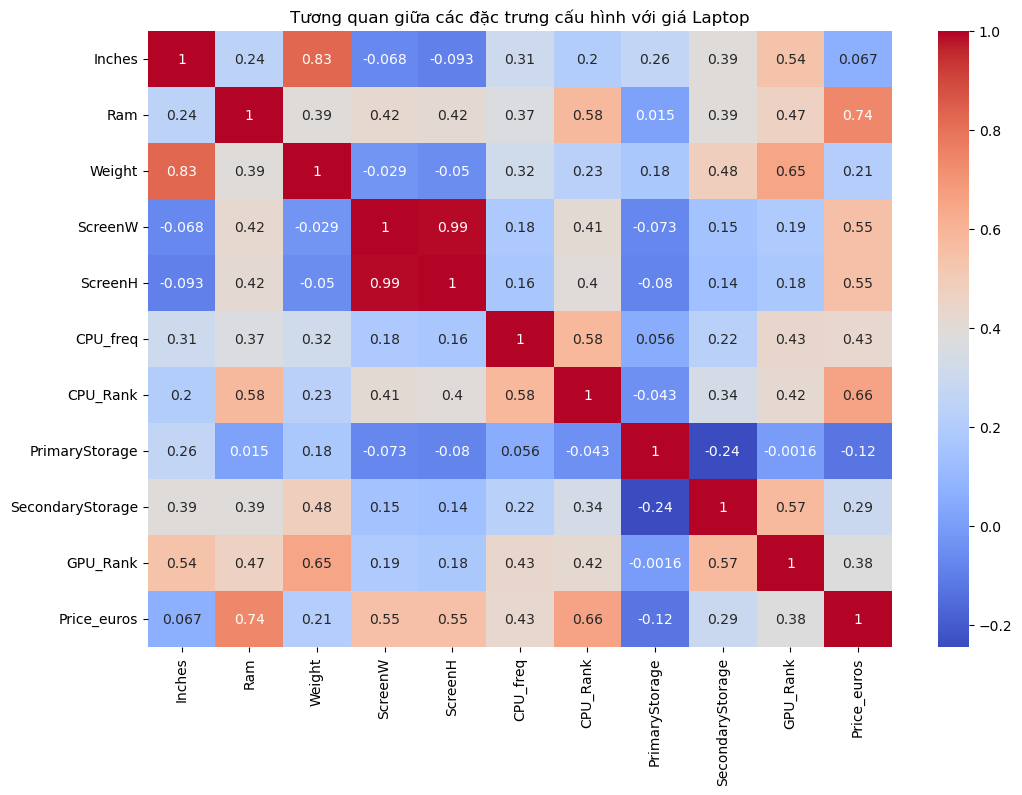

In [14]:

plt.figure(figsize=(12, 8))
sns.heatmap(df[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank', 'Price_euros']].corr(), annot=True, cmap='coolwarm')
plt.title('Tương quan giữa các đặc trưng cấu hình với giá Laptop')
plt.show()

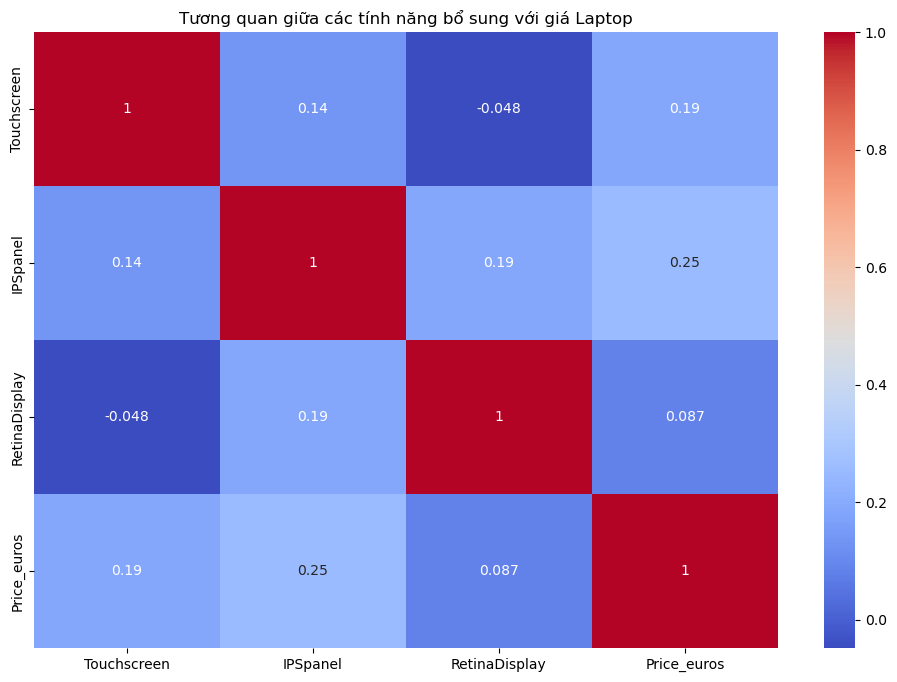

In [15]:
# Chuyển giá trị YES/NO sang 1/0 của 3 cột Touchscreen, IPSpanel, RetinaDisplay
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})
df['IPSpanel'] = df['IPSpanel'].map({'Yes': 1, 'No': 0})
df['RetinaDisplay'] = df['RetinaDisplay'].map({'Yes': 1, 'No': 0})


plt.figure(figsize=(12, 8))
sns.heatmap(df[['Touchscreen', 'IPSpanel', 'RetinaDisplay', 'Price_euros']].corr(), annot=True, cmap='coolwarm')
plt.title('Tương quan giữa các tính năng bổ sung với giá Laptop')
plt.show()

In [16]:
'''
sns.lmplot(x='Config_Score', y='Price_euros', data=df, aspect=1.5)
plt.title('Config_Score vs Price_euros')
plt.show()
'''

"\nsns.lmplot(x='Config_Score', y='Price_euros', data=df, aspect=1.5)\nplt.title('Config_Score vs Price_euros')\nplt.show()\n"

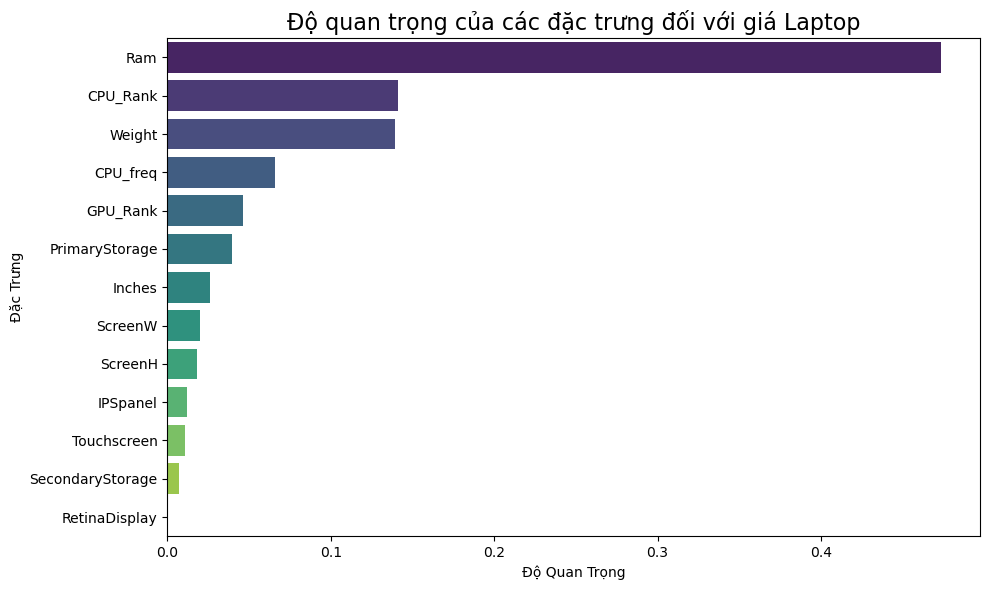

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Feature Importance
features = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank', 'Touchscreen', 'IPSpanel', 'RetinaDisplay']
X = df[features]
y = df['Price_euros']

# Khởi tạo và huấn luyện mô hình
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Tạo DataFrame cho feature importances để dễ dàng vẽ
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Biểu đồ độ quan trọng của từng đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    hue='Feature',
    palette='viridis',
    dodge=False
)
plt.title('Độ quan trọng của các đặc trưng đối với giá Laptop', fontsize=16)
plt.xlabel('Độ Quan Trọng')
plt.ylabel('Đặc Trưng')
plt.legend([], [], frameon=False)  # Ẩn legend
plt.tight_layout()
plt.show()

In [18]:
'''
# 1. Biểu đồ Scatter: Config_Score vs Price_euros cho từng thương hiệu
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top, x='Config_Score', y='Price_euros', hue='Company', style='Company', s=100)
plt.title('Mối Quan Hệ Giữa Điểm Cấu Hình và Giá Cả theo Thương Hiệu')
plt.xlabel('Điểm Cấu Hình Tổng Thể')
plt.ylabel('Giá (Euros)')
plt.legend(title='Thương Hiệu')
plt.grid(True)
plt.show()

# 2. Biểu đồ Bar: Thứ hạng các thương hiệu dựa trên chỉ số "Giá trị cấu hình" trung bình
value_score_mean = df_top.groupby('Company')['Value_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=value_score_mean.values, y=value_score_mean.index)
plt.title('Thứ Hạng Thương Hiệu Dựa Trên Chỉ Số Giá Trị Cấu Hình Trung Bình')
plt.xlabel('Giá Trị Cấu Hình Trung Bình')
plt.ylabel('Thương Hiệu')
plt.show()
'''

'\n# 1. Biểu đồ Scatter: Config_Score vs Price_euros cho từng thương hiệu\nplt.figure(figsize=(12, 8))\nsns.scatterplot(data=df_top, x=\'Config_Score\', y=\'Price_euros\', hue=\'Company\', style=\'Company\', s=100)\nplt.title(\'Mối Quan Hệ Giữa Điểm Cấu Hình và Giá Cả theo Thương Hiệu\')\nplt.xlabel(\'Điểm Cấu Hình Tổng Thể\')\nplt.ylabel(\'Giá (Euros)\')\nplt.legend(title=\'Thương Hiệu\')\nplt.grid(True)\nplt.show()\n\n# 2. Biểu đồ Bar: Thứ hạng các thương hiệu dựa trên chỉ số "Giá trị cấu hình" trung bình\nvalue_score_mean = df_top.groupby(\'Company\')[\'Value_Score\'].mean().sort_values(ascending=False)\n\nplt.figure(figsize=(12, 8))\nsns.barplot(x=value_score_mean.values, y=value_score_mean.index)\nplt.title(\'Thứ Hạng Thương Hiệu Dựa Trên Chỉ Số Giá Trị Cấu Hình Trung Bình\')\nplt.xlabel(\'Giá Trị Cấu Hình Trung Bình\')\nplt.ylabel(\'Thương Hiệu\')\nplt.show()\n'

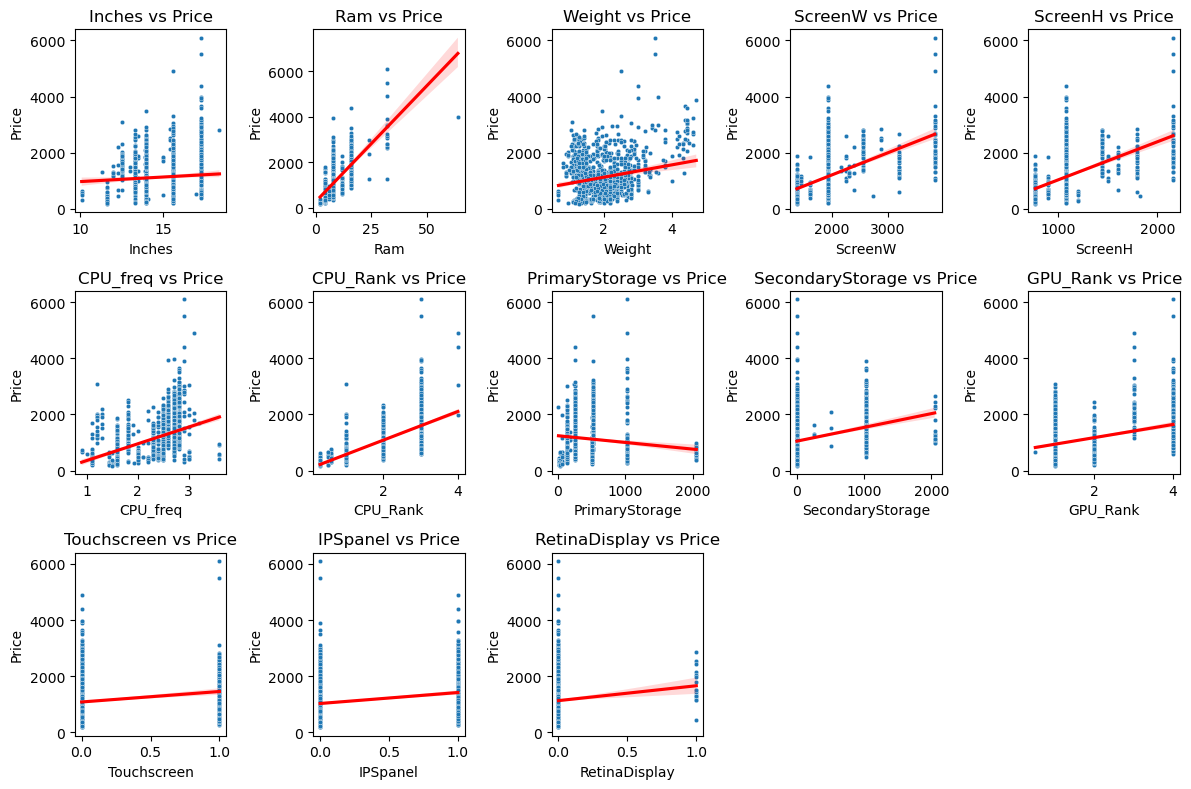

In [19]:
# vẽ scatter plot từng đặc trưng với cột Price_euros
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i + 1)
    sns.scatterplot(data=df, x=feature, y='Price_euros', s=10)
    # thêm đường xu hướng tuyến tính
    sns.regplot(data=df, x=feature, y='Price_euros', scatter=False, color='red')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

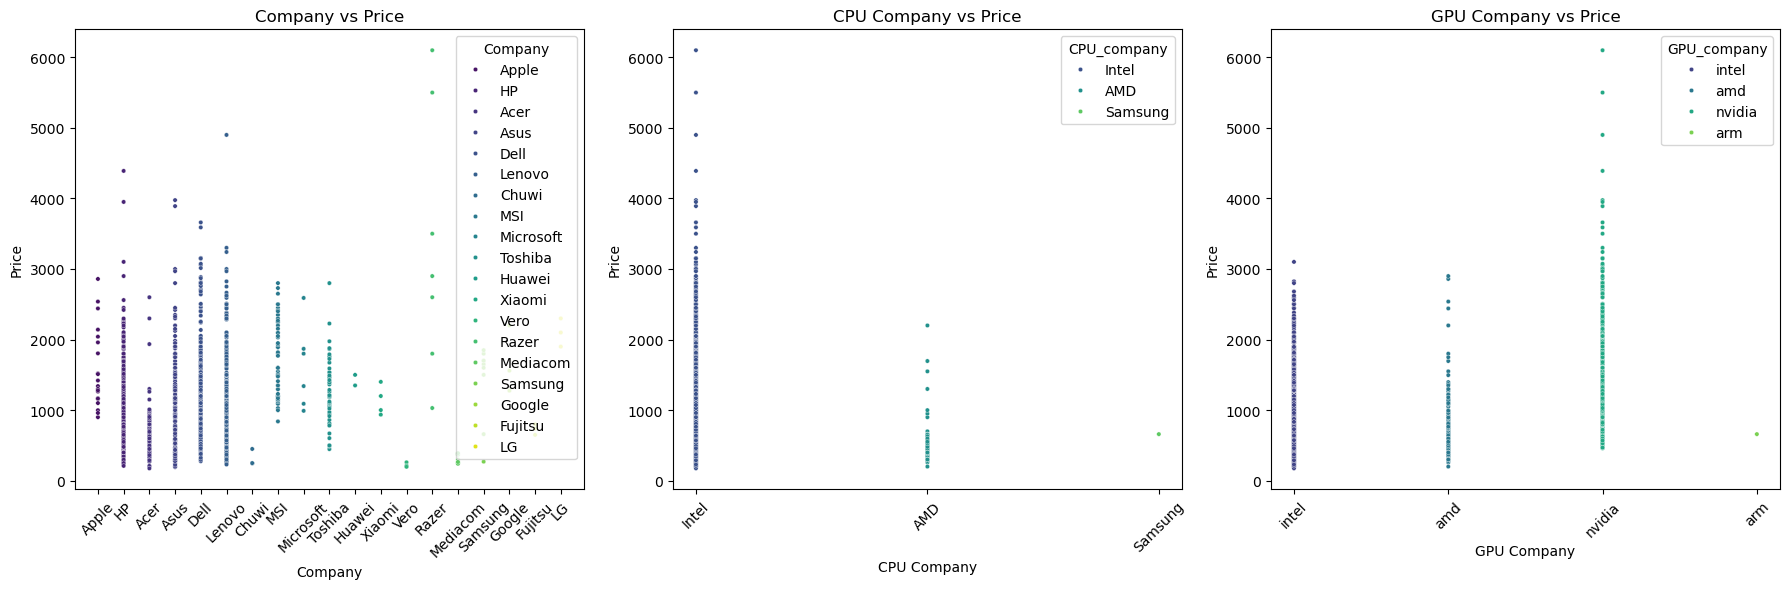

In [20]:
# Vẽ scatter plot giữa các hãng (Company), Hãng CPU (CPU_Company), Hãng GPU(GPU_Company) với giá (Price_euros) để thấy sự phân bố các hãng theo từng mức giá
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Company', y='Price_euros', hue='Company', palette='viridis', s=10)
plt.title('Company vs Price')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='CPU_company', y='Price_euros', hue='CPU_company', palette='viridis', s=10)
plt.title('CPU Company vs Price')
plt.xlabel('CPU Company')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='GPU_company', y='Price_euros', hue='GPU_company', palette='viridis', s=10)
plt.title('GPU Company vs Price')
plt.xlabel('GPU Company')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# Giá trị cao nhất và thấp nhất theo Company
price_by_company = df.groupby('Company')['Price_euros'].agg(['min', 'max'])
print("Giá cao nhất và thấp nhất theo Company:")
print(price_by_company)

# Giá trị cao nhất và thấp nhất theo CPU_company
price_by_cpu = df.groupby('CPU_company')['Price_euros'].agg(['min', 'max'])
print("\nGiá cao nhất và thấp nhất theo CPU_company:")
print(price_by_cpu)

# Giá trị cao nhất và thấp nhất theo GPU_company
price_by_gpu = df.groupby('GPU_company')['Price_euros'].agg(['min', 'max'])
print("\nGiá cao nhất và thấp nhất theo GPU_company:")
print(price_by_gpu)

Giá cao nhất và thấp nhất theo Company:
               min      max
Company                    
Acer        174.00  2599.00
Apple       898.94  2858.00
Asus        191.90  3975.00
Chuwi       244.99   449.00
Dell        274.90  3659.40
Fujitsu     649.00   799.00
Google     1275.00  2199.00
HP          209.00  4389.00
Huawei     1349.00  1499.00
LG         1899.00  2299.00
Lenovo      229.00  4899.00
MSI         839.00  2799.00
Mediacom    239.00   389.00
Microsoft   989.00  2589.00
Razer      1029.00  6099.00
Samsung     269.00  1849.00
Toshiba     447.00  2799.00
Vero        196.00   260.00
Xiaomi      935.00  1399.95

Giá cao nhất và thấp nhất theo CPU_company:
               min     max
CPU_company               
AMD          199.0  2199.0
Intel        174.0  6099.0
Samsung      659.0   659.0

Giá cao nhất và thấp nhất theo GPU_company:
               min     max
GPU_company               
amd          199.0  2899.0
arm          659.0   659.0
intel        174.0  3100.0
nvidia      

Gom nhóm theo các hãng, hãng CPU, hãng GPU rồi tính mức giá trung bình để thấy rõ liệu 3 đặc trưng đó có ảnh hưởng đến giá cả hay không

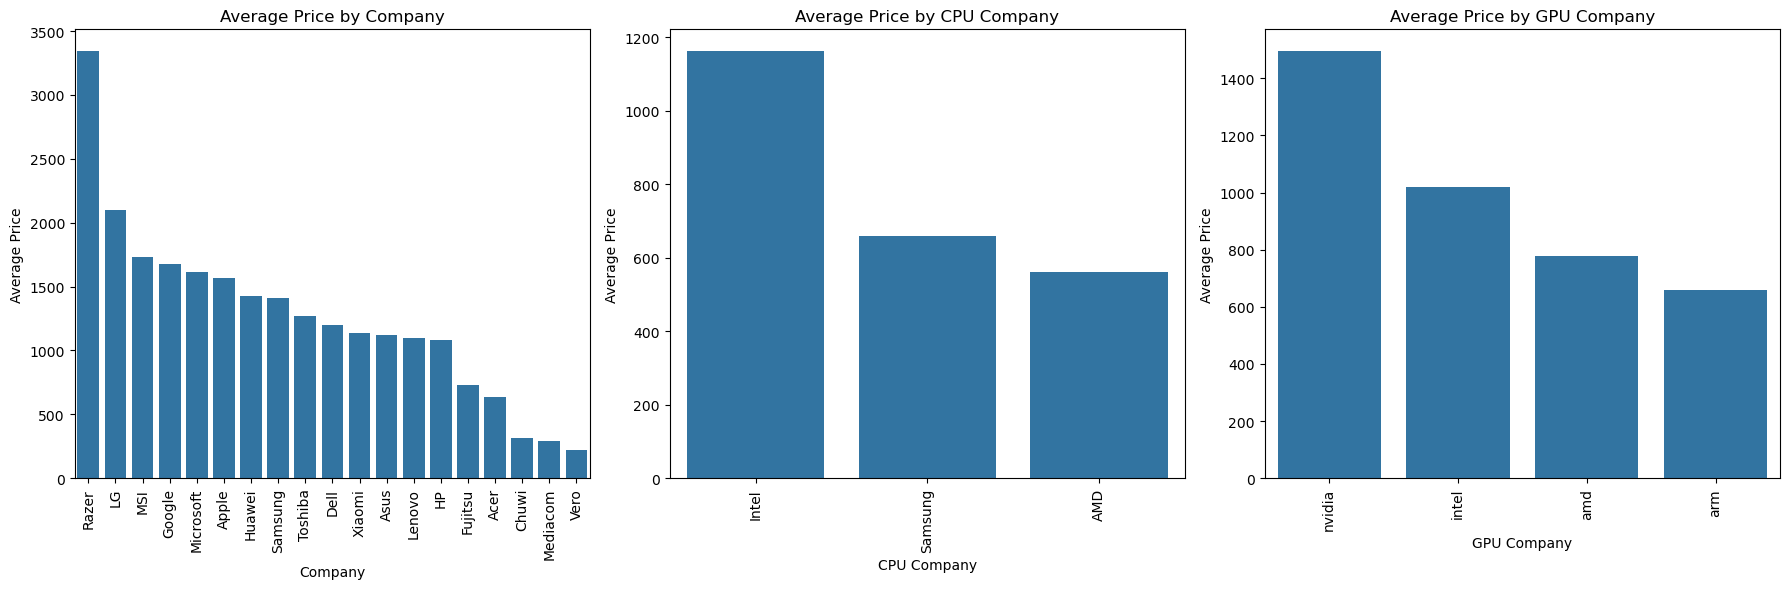

In [22]:
# Gom nhóm theo các hãng, hãng CPU, hãng GPU và tính giá trung bình
company_price = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
cpu_company_price = df.groupby('CPU_company')['Price_euros'].mean().sort_values(ascending=False)
gpu_company_price = df.groupby('GPU_company')['Price_euros'].mean().sort_values(ascending=False)

# Vẽ biểu đồ cột giá trung bình của các hãng, hãng CPU, hãng GPU
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=company_price.index, y=company_price.values)
plt.title('Average Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.barplot(x=cpu_company_price.index, y=cpu_company_price.values)
plt.title('Average Price by CPU Company')
plt.xlabel('CPU Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(x=gpu_company_price.index, y=gpu_company_price.values)
plt.title('Average Price by GPU Company')
plt.xlabel('GPU Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### c. Nhận xét và kết luận (trả lời câu hỏi) <a id="ivc"></a>

1. Biểu đồ scatter từng đặc trưng với cột Price_euros

Nhận xét:
- Kích thước màn hình (Inches, ScreenW, ScreenH): Kích thước màn hình lớn hơn thường đi kèm với giá cao hơn.
- RAM: Dung lượng RAM cao hơn thường tăng giá bán.
- Tần số CPU: CPU có tần số cao hơn thường có giá cao hơn.
- Các loại CPU và GPU (CPU_Rank, GPU_Rank): CPU và GPU phiên bản mới hơn, cao cấp hơn thường dẫn đến giá bán cao hơn.
- Bộ nhớ lưu trữ chính (PrimaryStorage): Bộ nhớ chính có dung lượng càng lớn giá càng lớn.
- Màn hình cảm ứng (Touchscreen) và màn hình IPS (IPSpanel): Các tính năng bổ sung này thường làm tăng giá thành sản phẩm.

Các đặc trưng còn lại có mối quan hệ không rõ ràng với Giá:
- Trọng lượng (Weight): Trọng lượng không ảnh hưởng mạnh đến giá cả.
- Dung lượng lưu trữ phụ (SecondaryStorage): Không có mối liên hệ mạnh mẽ với giá.
- Màn hình Retina (RetinaDisplay): Không có mối quan hệ đáng kể với giá cả.

2. 

Biểu đồ 1: Biểu đồ scatter giữa các hãng (Company), Hãng CPU (CPU_Company), Hãng GPU(GPU_Company) với giá (Price_euros)

Biểu đồ 2: Gom nhóm và biểu diễn giá trung bình các hãng dưới biểu đồ cột

Nhận xét:
- Các hãng (Company): Apple, Dell, Lenovo, HP, Asus, Acer, Razer có các sản phẩm nằm ở mức giá khá cao (cao nhất là Razer, tiếp đến là Lenevo và Hp,...) . Các hãng như Mediacom, Vero, Chuwi có giá trung bình thấp hơn. -> Ta có thể nói hãng cũng ảnh hưởng một phần đến giá cả
- Hãng CPU (CPU_Company): Các laptop sử dụng CPU của Intel nằm ở nhiều mức giá và có cả mức giá cao nhất, tiếp đến là AMD và ít (nằm ở mức giá thấp) nhất là Samsung.
- Hãng GPU (GPU_Company): Các laptop sử dụng GPU của Nvidia nằm ở nhiều mức giá và đạt mức giá cao nhất, theo sau là Intel và AMD, thấp nhất là Arm.

### 2. Câu hỏi 2 <a id="iv2"></a>

Liệu có hãng laptop nào chung thủy với một loại CPU và GPU nhất định (mở rộng ra là chung thủy với một cấu hình nhất định)? Và điều này ảnh hưởng như thế nào đến giá cả?  

#### a. Tiền xử lý <a id="iv2a"></a>

Tính tỷ lệ sử dụng từng CPU và GPU cho từng hãng

In [23]:
# Tạo bảng tần số sử dụng CPU_model và GPU_model theo Company
cpu_usage = df.groupby(['Company', 'CPU_Type']).size().reset_index(name='Count')
gpu_usage = df.groupby(['Company', 'GPU_Type']).size().reset_index(name='Count')

cpu_usage['CPU_ratio'] = cpu_usage.groupby('Company')['Count'].transform(lambda x: x / x.sum())
gpu_usage['GPU_ratio'] = gpu_usage.groupby('Company')['Count'].transform(lambda x: x / x.sum())

Xác định cấu hình chung thủy (tỷ lệ sử dụng cao, ví dụ >50%)

threshold = 0.4 -> có thể điều chỉnh

In [24]:
threshold = 0.4

# Lọc các cấu hình có tỷ lệ sử dụng cao
loyal_cpu = cpu_usage[cpu_usage['CPU_ratio'] > threshold]
loyal_gpu = gpu_usage[gpu_usage['GPU_ratio'] > threshold]

print("\nHãng chung thủy với CPU:")
print(loyal_cpu)


Hãng chung thủy với CPU:
      Company       CPU_Type  Count  CPU_ratio
6       Apple  intel core i5     12   0.571429
16       Asus  intel core i7     74   0.486842
20      Chuwi     intel atom      2   0.666667
25       Dell  intel core i7    128   0.439863
29    Fujitsu  intel core i5      3   1.000000
30     Google  intel core i5      2   0.666667
41     Huawei  intel core i5      1   0.500000
42     Huawei  intel core i7      1   0.500000
43         LG  intel core i7      3   1.000000
56        MSI  intel core i7     48   0.888889
57   Mediacom     intel atom      4   0.571429
58   Mediacom  intel celeron      3   0.428571
60  Microsoft  intel core i7      3   0.500000
62      Razer  intel core i7      7   1.000000
65    Samsung  intel core i7      6   0.666667
68    Toshiba  intel core i5     27   0.562500
71       Vero     intel atom      2   0.500000
72       Vero  intel celeron      2   0.500000
73     Xiaomi  intel core i5      3   0.750000


Tạo cấu hình kết hợp CPU và GPU để kiểm tra sự chung thủy với cấu hình cụ thể

In [25]:
df['CPU_GPU'] = df['CPU_Type'] + " + " + df['GPU_Type']
cpu_gpu_usage = df.groupby(['Company', 'CPU_GPU']).size().reset_index(name='Count')
cpu_gpu_usage['CPU_GPU_ratio'] = cpu_gpu_usage.groupby('Company')['Count'].transform(lambda x: x / x.sum())

In [26]:
# Lọc các cấu hình có tỷ lệ sử dụng cao
loyal_cpu_gpu = cpu_gpu_usage[cpu_gpu_usage['CPU_GPU_ratio'] > threshold]

print("\nHãng chung thủy với cấu hình CPU + GPU:")
print(loyal_cpu_gpu)


Hãng chung thủy với cấu hình CPU + GPU:
       Company                                     CPU_GPU  Count  \
13       Apple              intel core i5 + Intel Graphics     12   
35       Chuwi                 intel atom + Intel Graphics      2   
55     Fujitsu              intel core i5 + Intel Graphics      3   
56      Google              intel core i5 + Intel Graphics      2   
80      Huawei              intel core i5 + Intel Graphics      1   
81      Huawei              intel core i7 + Intel Graphics      1   
82          LG              intel core i7 + Intel Graphics      3   
107        MSI     intel core i7 + Nvidia GeForce High-End     47   
109   Mediacom                 intel atom + Intel Graphics      4   
110   Mediacom              intel celeron + Intel Graphics      3   
112  Microsoft              intel core i7 + Intel Graphics      3   
115      Razer     intel core i7 + Nvidia GeForce High-End      5   
124    Toshiba              intel core i5 + Intel Graphics    

Phân Tích Ảnh Hưởng Đến Giá Cả

In [27]:
# Giá trung bình cho các sản phẩm có cấu hình chung thủy
# Đối với CPU
avg_price_loyal_cpu = df.merge(loyal_cpu, on=['Company', 'CPU_Type'], how='inner').groupby('Company')['Price_euros'].mean().reset_index(name='Avg_Price_Loyal_CPU')
# Đối với GPU
avg_price_loyal_gpu = df.merge(loyal_gpu, on=['Company', 'GPU_Type'], how='inner').groupby('Company')['Price_euros'].mean().reset_index(name='Avg_Price_Loyal_GPU')
# CPU + GPU
avg_price_loyal_cpu_gpu = df.merge(loyal_cpu_gpu, on=['Company', 'CPU_GPU'], how='inner').groupby('Company')['Price_euros'].mean().reset_index(name='Avg_Price_Loyal_CPU_GPU')

In [28]:
df['Loyal_CPU'] = df.apply(lambda row: 1 if ((row['Company'], row['CPU_Type']) in loyal_cpu[['Company', 'CPU_Type']].itertuples(index=False)) else 0, axis=1)
df['Loyal_GPU'] = df.apply(lambda row: 1 if ((row['Company'], row['GPU_Type']) in loyal_gpu[['Company', 'GPU_Type']].itertuples(index=False)) else 0, axis=1)
df['Loyal_CPU_GPU'] = df.apply(lambda row: 1 if ((row['Company'], row['CPU_GPU']) in loyal_cpu_gpu[['Company', 'CPU_GPU']].itertuples(index=False)) else 0, axis=1)

# Chọn cấu hình chung thủy CPU + GPU
df['Loyal_Config'] = df['Loyal_CPU_GPU']

# Chọn cấu hình không chung thủy
non_loyal_df = df[df['Loyal_Config'] == 0]

# Tính giá trung bình cho các sản phẩm không chung thủy
avg_price_non_loyal = non_loyal_df.groupby('Company')['Price_euros'].mean().reset_index(name='Avg_Price_Non_Loyal')

# Giá trung bình cho tất cả sản phẩm
avg_price_all = df.groupby('Company')['Price_euros'].mean().reset_index(name='Avg_Price_All') 


In [29]:
# Kết hợp các thông tin
price_comparison = avg_price_all = df.groupby('Company')['Price_euros'].mean().reset_index(name='Avg_Price_All') \
    .merge(avg_price_loyal_cpu, on='Company', how='left') \
    .merge(avg_price_loyal_gpu, on='Company', how='left') \
    .merge(avg_price_loyal_cpu_gpu, on='Company', how='left') \
    .merge(avg_price_non_loyal, on='Company', how='left')

print("\nSo sánh giá trung bình:")
print(price_comparison)


So sánh giá trung bình:
      Company  Avg_Price_All  Avg_Price_Loyal_CPU  Avg_Price_Loyal_GPU  \
0        Acer     633.464455                  NaN           490.725818   
1       Apple    1564.198571          1391.948333          1389.597222   
2        Asus    1123.829737          1591.992027           746.551967   
3       Chuwi     314.296667           246.945000           314.296667   
4        Dell    1199.225120          1589.946016          1066.232571   
5     Fujitsu     729.000000           729.000000           729.000000   
6      Google    1677.666667          1417.000000          1677.666667   
7          HP    1080.314664                  NaN          1087.781792   
8      Huawei    1424.000000          1424.000000          1424.000000   
9          LG    2099.000000          2099.000000          2099.000000   
10     Lenovo    1093.862215                  NaN          1082.535682   
11        MSI    1728.908148          1809.010208          1708.717736   
12   Mediacom

#### b. Trực quan hóa <a id="iv2b"></a>

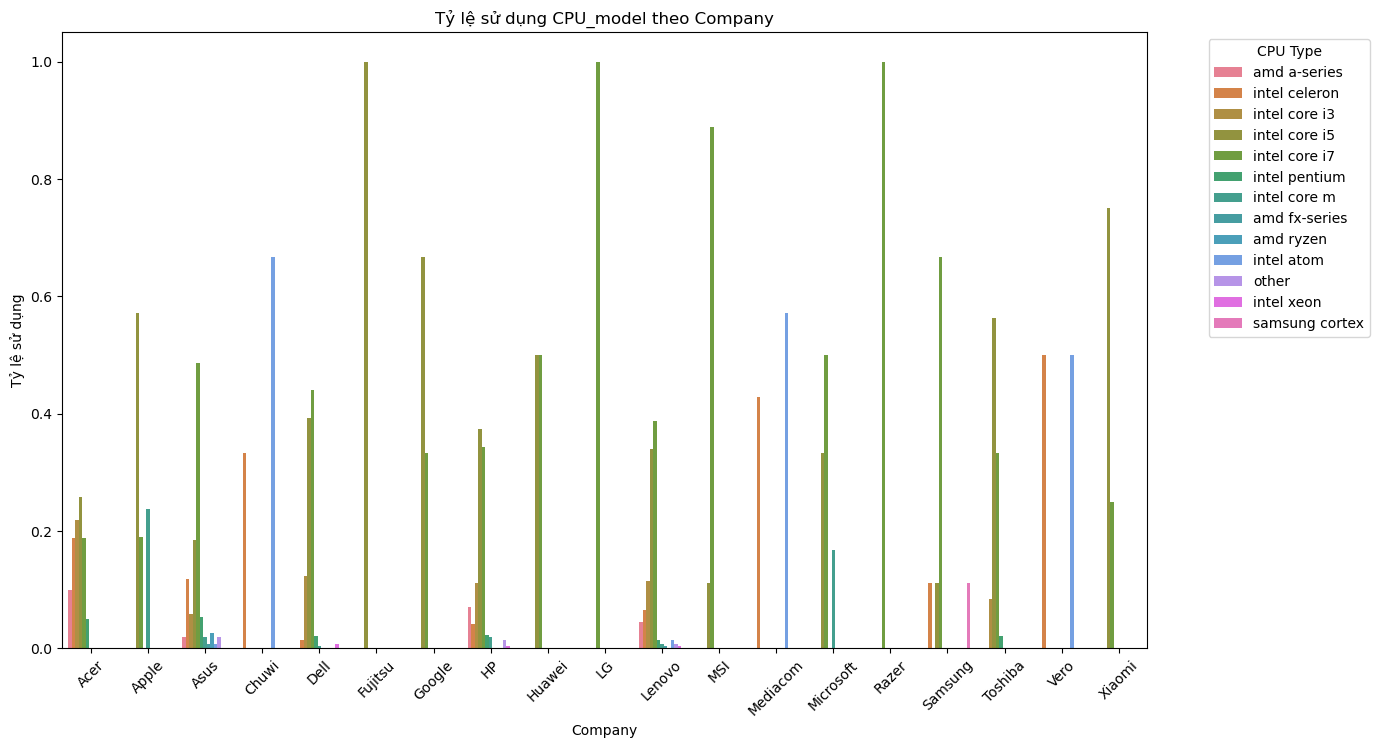

In [30]:
# Biểu đồ cột tỷ lệ sử dụng CPU theo hãng
plt.figure(figsize=(14, 8))
sns.barplot(data=cpu_usage, x='Company', y='CPU_ratio', hue='CPU_Type')
plt.title('Tỷ lệ sử dụng CPU_model theo Company')
plt.ylabel('Tỷ lệ sử dụng')
plt.xticks(rotation=45)
plt.legend(title='CPU Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

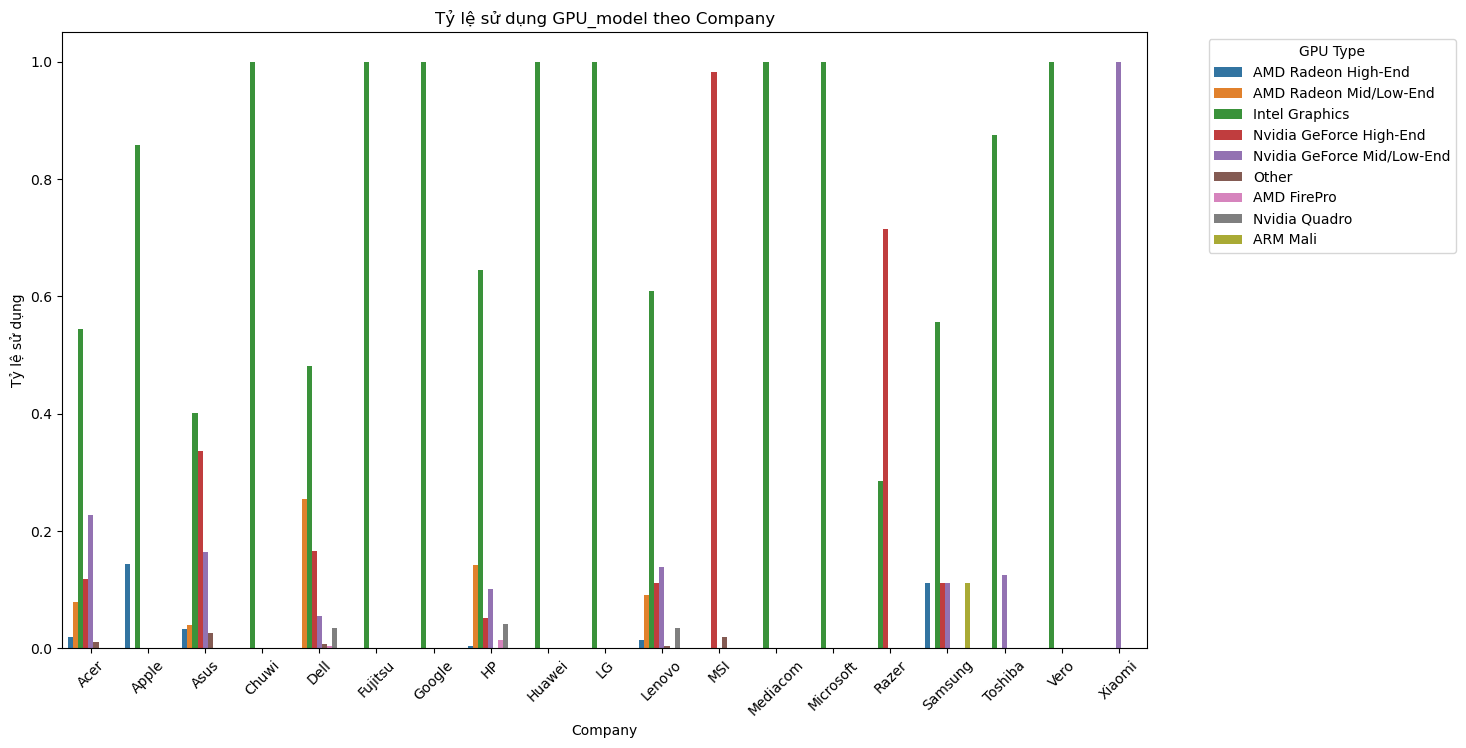

In [31]:
# Biểu đồ cột tỷ lệ sử dụng GPU theo hãng
plt.figure(figsize=(14, 8))
sns.barplot(data=gpu_usage, x='Company', y='GPU_ratio', hue='GPU_Type')
plt.title('Tỷ lệ sử dụng GPU_model theo Company')
plt.ylabel('Tỷ lệ sử dụng')
plt.xticks(rotation=45)
plt.legend(title='GPU Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

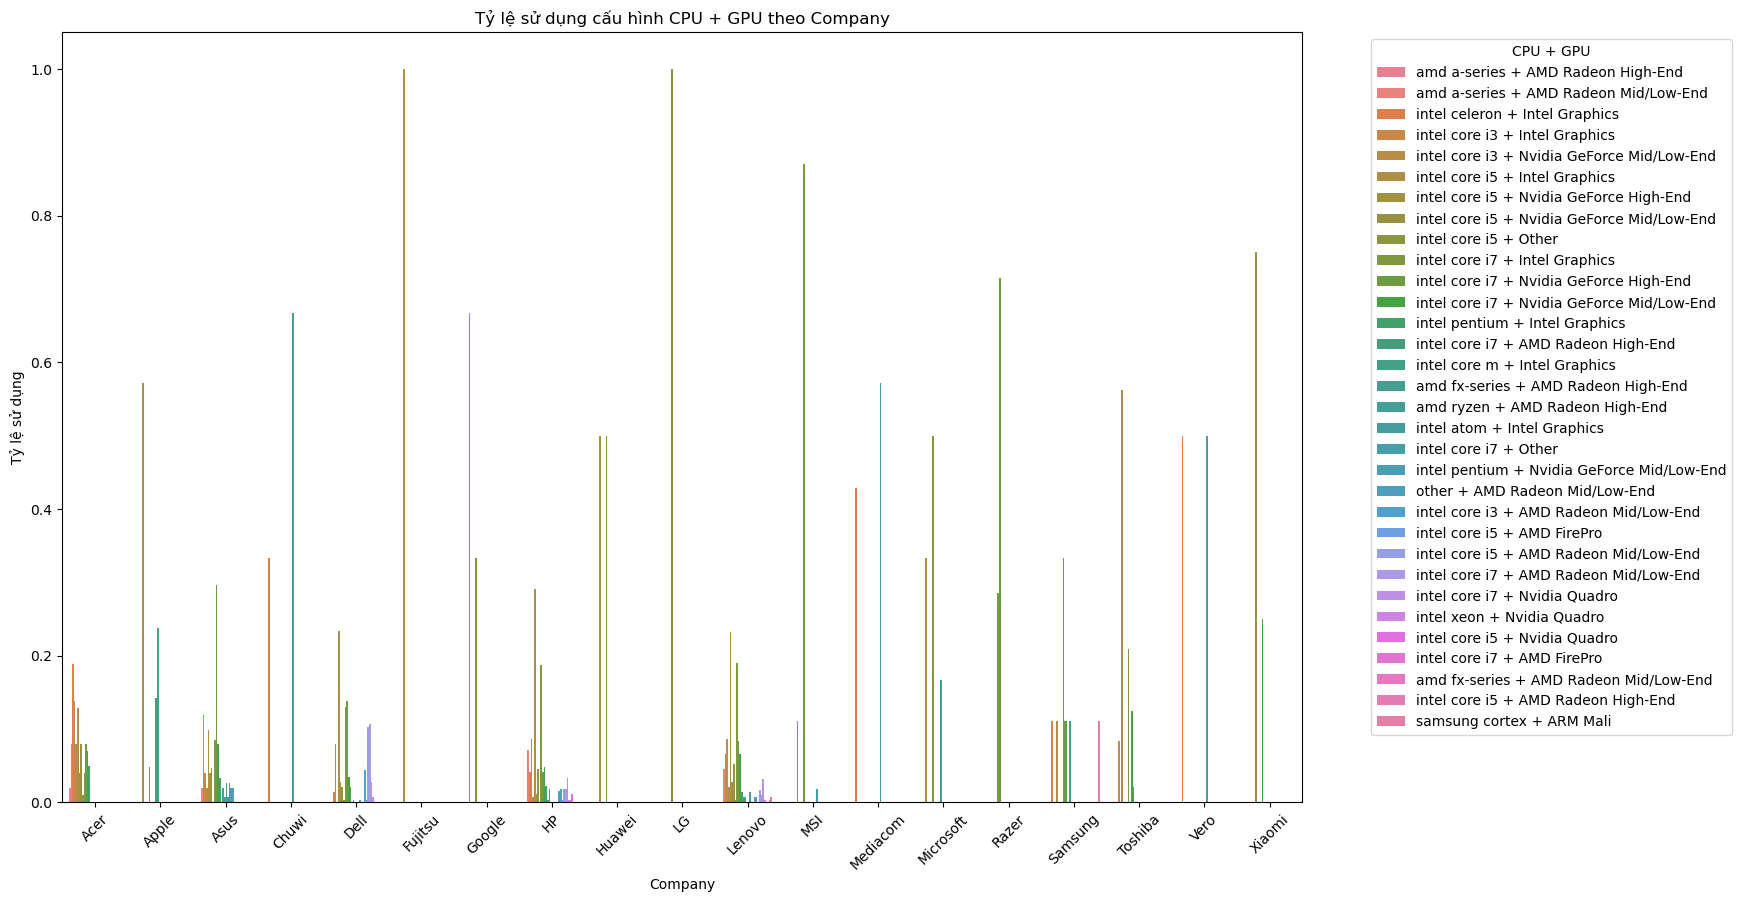

In [32]:
# Biểu đồ cột tỷ lệ sử dụng cấu hình CPU + GPU theo hãng
plt.figure(figsize=(16, 10))
sns.barplot(data=cpu_gpu_usage, x='Company', y='CPU_GPU_ratio', hue='CPU_GPU')
plt.title('Tỷ lệ sử dụng cấu hình CPU + GPU theo Company')
plt.ylabel('Tỷ lệ sử dụng')
plt.xticks(rotation=45)
plt.legend(title='CPU + GPU', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

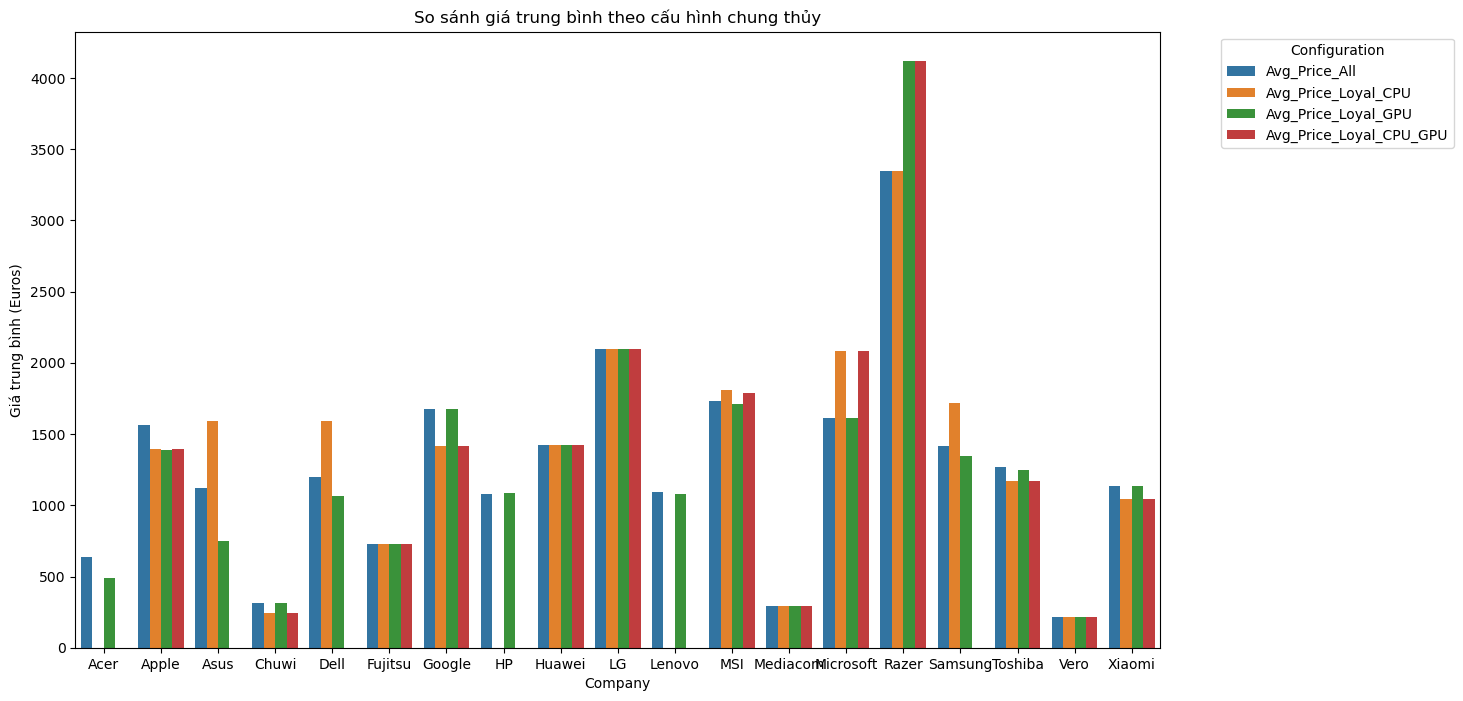

In [33]:
# Biểu đồ so sánh giá trung bình giữa các cấu hình chung thủy và tất cả sản phẩm
price_comparison_melt = price_comparison.melt(id_vars='Company', value_vars=['Avg_Price_All', 'Avg_Price_Loyal_CPU', 'Avg_Price_Loyal_GPU', 'Avg_Price_Loyal_CPU_GPU'], 
                                             var_name='Configuration', value_name='Average_Price')

plt.figure(figsize=(14, 8))
sns.barplot(data=price_comparison_melt, x='Company', y='Average_Price', hue='Configuration')
plt.title('So sánh giá trung bình theo cấu hình chung thủy')
plt.ylabel('Giá trung bình (Euros)')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


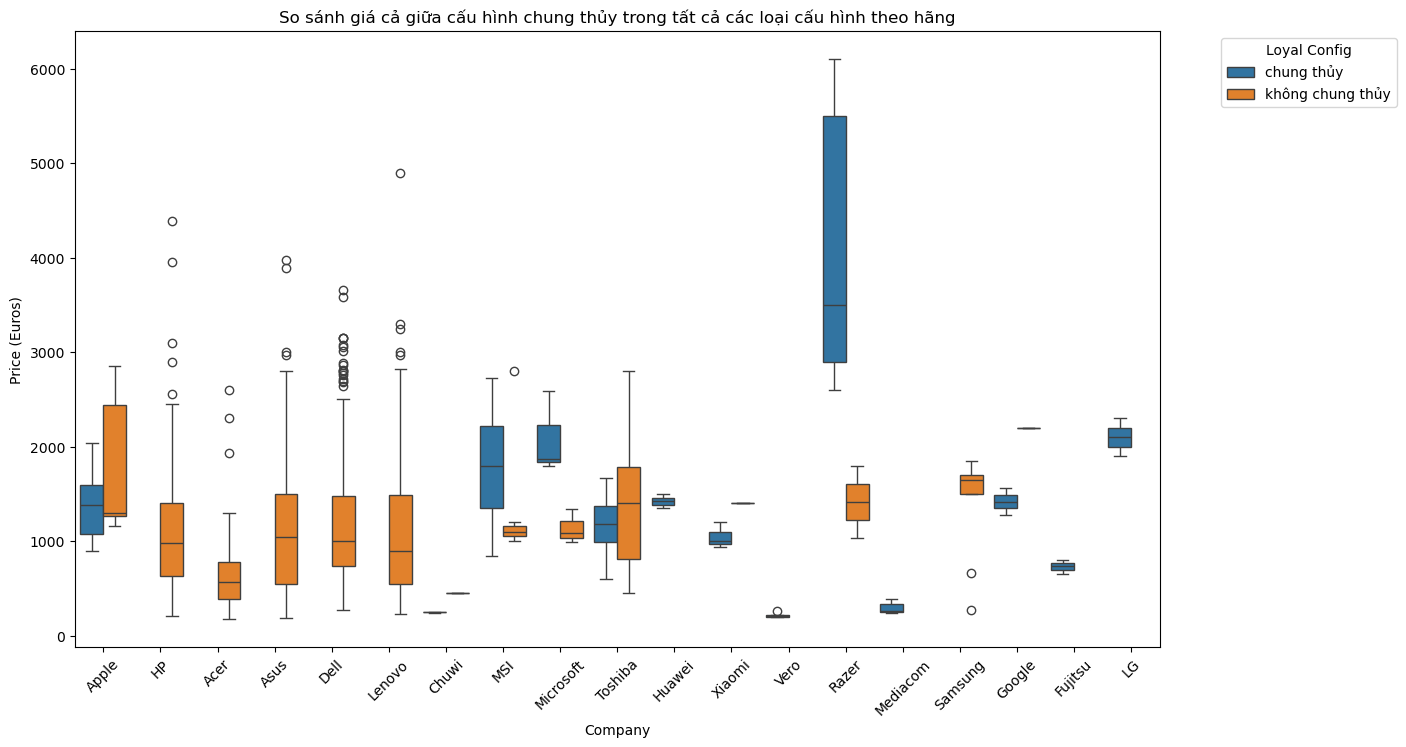

In [35]:
# Biểu đồ boxplot so sánh giá cả giữa các cấu hình chung thủy và không chung thủy theo hãng
# Gán 0 là 'không chung thủy', 1 là 'chung thủy'
df['Loyal_Config'] = df['Loyal_Config'].map({0: 'không chung thủy', 1: 'chung thủy'})

plt.figure(figsize=(14, 8))
sns.boxplot(x='Company', y='Price_euros', hue='Loyal_Config', data=df)
plt.title('So sánh giá cả giữa cấu hình chung thủy trong tất cả các loại cấu hình theo hãng')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.ylabel('Price (Euros)')
plt.legend(title='Loyal Config', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### c. Nhận xét và kết luận (trả lời câu hỏi) <a id="iv2c"></a>

### 3. Câu hỏi 3 <a id="iv3"></a>

### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

## V. Nhận xét quá trình làm đồ án  <a id="v"></a>

### 1. Thành viên 1  <a id="v1"></a>

### 2. Thành viên 2  <a id="v2"></a>

### 3. Thành viên 3  <a id="v3"></a>

### 4. Ý kiến nhóm  <a id="v4"></a>

Nếu có thêm thời gian thì làm gì?

## Tài liệu tham khảo  <a id="tltk"></a>